<a href="https://colab.research.google.com/github/Himanshu584/Fashion_Mnist/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataSet :- 
  Fashion Mnist is built-in dataset with tensorflow datasets containing 70,000 images of Clothing Items .

  Dataset is split into 2 sets:
  * Training Data ( 60,000 images )
  * Test Data ( 10,000 images )
  

In [2]:
# Import tensorflow 
import tensorflow as tf
tf.__version__

'2.4.1'

In [3]:
# Load Data 
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Lets view how some of our data looks

* print 10 samples 

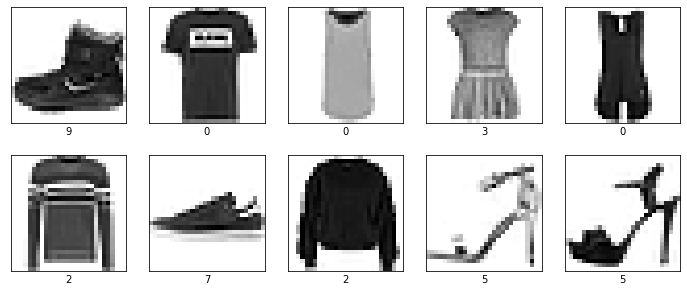

In [14]:
import matplotlib.pyplot as plt  # for graphical / visual representation
import numpy as np # To work with numbers and arrays

plt.figure(figsize=(12,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

Looks like labeo 9 is a shoe, 5 a sandal , 3 a dress and so on ...

it would be easy if we could map these to their respective classes.

we have 10 diffrent classes 

In [19]:
# class labels list
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

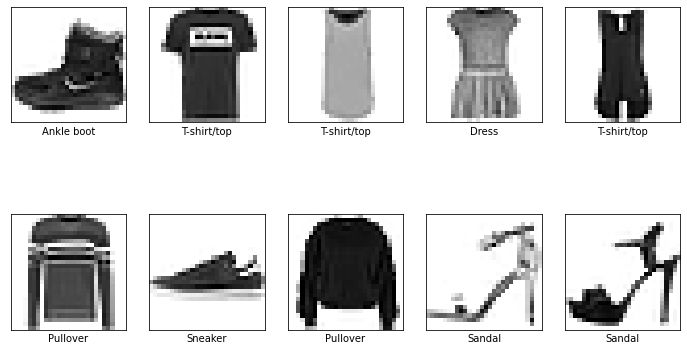

In [20]:
# lets again visualise our data 

plt.figure(figsize=(12,7))

for i in range(10):
  plt.subplot(2,5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_labels[train_labels[i]])
plt.show()

Its definatly better than before !

# Normalising/Scaling

 since we have images it is better to scale down the images by dividing each train and test images by 255.0 

In [28]:
# Scale training and testing images
def scale(images):
  images = images/255. 
  images = tf.cast(images, tf.float32)

  return images

train_images_scaled = scale(train_images)
test_images_scaled = scale(test_images)

train_images_scaled.dtype, test_images_scaled.dtype

(tf.float32, tf.float32)

 We have scaled our training and testing images. We first build a function that takes images as an argument and then divides it by 255.0 to scale down the image.Then the image gets cast into `float32` format which is what neural networks are most comfortable with.


Now we can build our classification Deep learning model 

# Model Building

First model = `model_1` :
* 1 flatten layer with input shape = (28,28) 
* 2 hidden layers with 5 hidden neurons each
* 1 output layer with 10 output values because we have 10 diffrent classes
* train for 50 epochs

we haven't split our data to have validation set so we'll train on training data and evaluate on test data 

In [36]:
train_labels = tf.cast(train_labels, tf.float32)
train_labels.dtype

tf.float32

we had to change the datatype of labels because they were of dtype uint8 which is not supported by tensorflow 

In [51]:
# set random seed for reproducability 
tf.random.set_seed(42)

# Build model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit model

history_1 = model_1.fit(train_images_scaled,train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9977 - accuracy: 0.2675
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1999 - accuracy: 0.5624
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0122 - accuracy: 0.6077
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9404 - accuracy: 0.6314
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8952 - accuracy: 0.6484
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8808 - accuracy: 0.6552
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8563 - accuracy: 0.6685
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8395 - accuracy: 0.6778
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8323 - accuracy: 0.6815
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.801

In [55]:
# Evaluate on test data 
test_labels = tf.cast(test_labels, tf.float32)
loss , accuracy = model_1.evaluate(test_images_scaled, test_labels)

print(f"Model evaluation loss: {loss} \n")
print(f"Model Evalaution accuracy: {(accuracy * 100):.2f} %")

313/313 [==============================] - 0s 1ms/step - loss: 0.6503 - accuracy: 0.7682
Model evaluation loss: 0.6503485441207886 

Model Evalaution accuracy: 76.82 %


Lets plot our loss curve

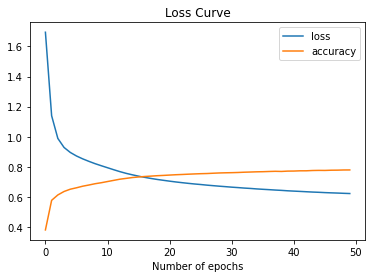

In [57]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title="Loss Curve",xlabel="Number of epochs")

Lets try if we could improve our model 

# Model_2
Lets build `model-2` with:
* Same number of layers as model_1 but with number of hidden neurons as 10 each

This time lets set early stopping callback and also increase the learning rate to 0.01

In [59]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                60        
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [60]:
# set random seed 
tf.random.set_seed(42)

# Build model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

# Compile model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

# Fit model 
history_2 = model_2.fit(train_images_scaled, train_labels, epochs=50, callbacks=[early_stopping], verbose=0 )

In [61]:
# Model_2 Evaluation
loss,accuracy = model_2.evaluate(test_images_scaled, test_labels, verbose=0)

print(f"Model_2 evaluation loss: {loss}")
print(f"Model_2 evaluation accuracy: {(accuracy * 100):.2f} %")

Model_2 evaluation loss: 0.4343843162059784
Model_2 evaluation accuracy: 85.21 %


For sure, Our Model_2 Outperforms model_1 by around 9 %

lets visualize our loss curve for model 2 now and compare it to model_1 loss curve

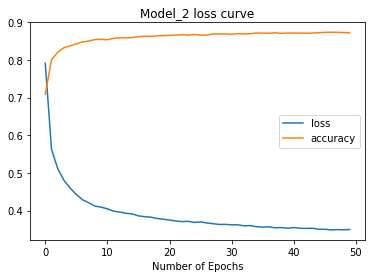

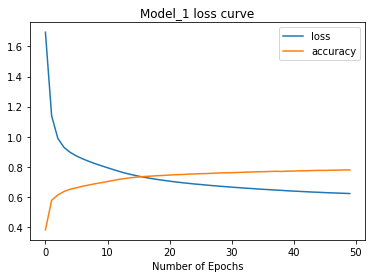

In [65]:
pd.DataFrame(history_2.history).plot(title="Model_2 loss curve", xlabel="Number of Epochs")
pd.DataFrame(history_1.history).plot(title="Model_1 loss curve", xlabel="Number of Epochs")

we can see model_2 loss curve goes much lower as compared to model_1 so surely our model_2 is best fit in this case.

though we can try to improve our model more but for the time being model_2 is ready to use with around 85% accuracy rate.

**Thankyu!**